# ADWIN (ADaptive Windowing)

ADWIN is a change (drift) detector algorithm. It keeps the maximal window that is statistically consistent and drops older elements once the sub-window $W_0$ at the tail of the window $W$ exhibits statistically significant difference in the mean of their elements, compared to the mean of the recent sub-window $W_1$.

In [61]:
import random
import matplotlib.pyplot as plt

from river import drift

RAND = 42
DELTA = .002
CLOCK = 12

rng = random.Random(RAND)

stream = rng.choices([0, 1], k=100) + rng.choices([4, 8], k=100)
adwin = drift.ADWIN(delta=DELTA, clock=CLOCK)
det_points = []

for i, x in enumerate(stream):
	adwin.update(x)
	if adwin.drift_detected:
		det_points.append(i)
		print(f"Change detected at index {i}, value {x}")

Change detected at index 119, value 4


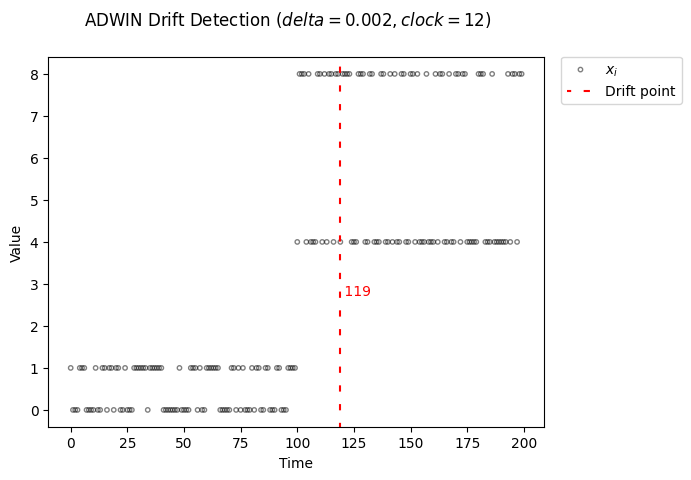

In [62]:
plt.figure()
plt.suptitle(f"ADWIN Drift Detection ($delta={DELTA}, clock={CLOCK}$)")

plt.scatter(range(len(stream)), stream, s=10, color="none", edgecolor="black", alpha=.5, label="$x_i$")
plt.axvline(det_points, linestyle=(1, (3, 6)), color="red", label="Drift point")

for dp in det_points:
	plt.text(dp, 3, f" {dp}", verticalalignment="top", color="red")

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.show()